<a href="https://colab.research.google.com/github/bism-tn/s3_mini_project/blob/main/project_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [ ]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [ ]:
for column in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[column].notnull()]
df.drop(df.columns[0], inplace=True, axis=1)

In [ ]:
df.shape


(22628, 10)

In [ ]:
df['Label'] = 0

In [ ]:
df.loc[df.Rating >= 3, ['Label']] = 1

In [ ]:
df['Word Count'] = df['Review Text'].str.split().apply(len)

In [ ]:
df.sample(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Word Count
18976,820,69,Beautiful design,My daughter tried on this shirt in new york & ...,5,1,0,General,Tops,Blouses,1,31
6511,1020,31,Great skirt,Fits great and i love the length. very cute sk...,5,1,0,General,Bottoms,Skirts,1,10
15283,916,62,Beautiful!,This sweater is beautiful and looks exactly as...,5,1,13,General,Tops,Fine gauge,1,71
18273,854,54,Gorgeous top,This is a beautiful shirt. i purchased the top...,5,1,0,General,Tops,Knits,1,35
2863,863,64,NaN,I love this tee shirt. i love the higher neckl...,5,1,0,General,Tops,Knits,1,99
8977,940,54,Linty & pills,This jacket is so cute and fits perfect and i ...,1,0,2,General,Tops,Sweaters,0,76
19413,873,61,Best fall tee!,"Works great on my 5'11"" frame. is pretty and ...",5,1,0,General Petite,Tops,Knits,1,16
21215,314,36,NaN,Material is gorgeous and soft but the fit is a...,3,0,0,Initmates,Intimate,Swim,1,62
16191,936,31,NaN,I wish i could wear this sweater every day! it...,5,1,0,General Petite,Tops,Sweaters,1,83
19956,873,41,Pretty piece,This is a pretty everyday piece to add to your...,4,1,9,General,Tops,Knits,1,69


In [ ]:
df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0


In [ ]:
df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

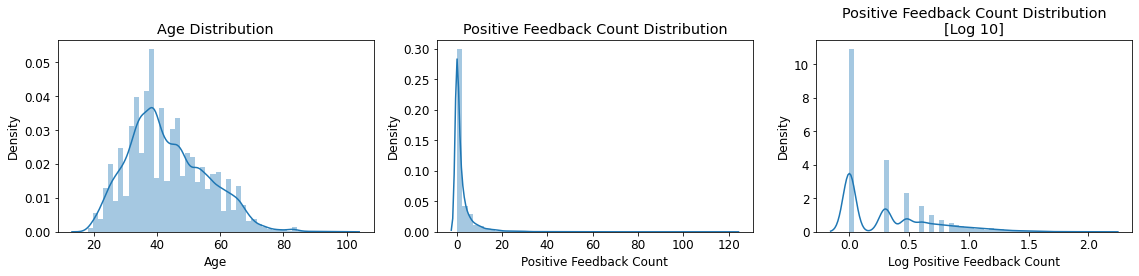

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_ylabel('Density')
sns.distplot(df['Positive Feedback Count'], ax=ax[1])
ax[1].set_title('Positive Feedback Count Distribution')
sns.distplot(np.log10((df['Positive Feedback Count'][df['Positive Feedback Count'].notnull()] + 1)), ax=ax[2])
ax[2].set_title('Positive Feedback Count Distribution\n[Log 10]')
ax[2].set_xlabel('Log Positive Feedback Count')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('age-and-positive-feedback-freqdist.png', format='png', dpi=600)
plt.show()

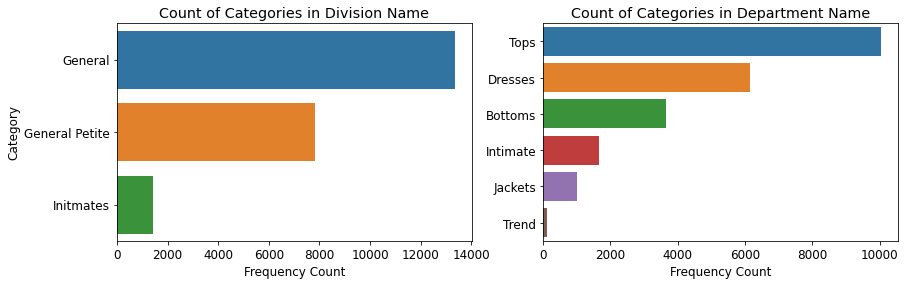

In [ ]:
row_plots = ['Division Name', 'Department Name']
f, axes = plt.subplots(1, len(row_plots), figsize=(14, 4), sharex=False)

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.savefig('divname-and-deptname-freqdist.png', format='png', dpi=600)
plt.show()

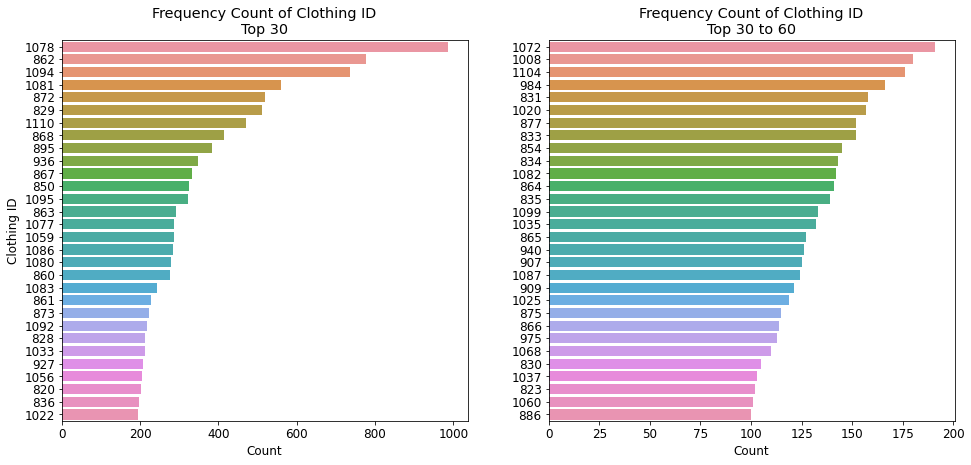

Dataframe Dimension: 22628 Rows


,mean,std,min,25%,50%,75%,max
Clothing ID,1015.4848,103.396022,862.0,862.0,1078.0,1094.0,1094.0
Age,42.7248,12.150429,18.0,34.0,41.0,51.0,99.0
Rating,4.1892,1.104306,1.0,4.0,5.0,5.0,5.0
Recommended,0.8184,0.385592,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.8624,6.773021,0.0,0.0,1.0,3.0,98.0
Label,0.9024,0.296832,0.0,1.0,1.0,1.0,1.0
Word Count,60.5912,28.731486,2.0,36.0,60.0,89.0,115.0


In [ ]:
f, axes = plt.subplots(1, 2, figsize=[16, 7])
num = 30
sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[:num].index)],
              order= df['Clothing ID'].value_counts()[:num].index, ax=axes[0])
axes[0].set_title('Frequency Count of Clothing ID\nTop 30')
axes[0].set_xlabel('Count')

sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[num:60].index)],
              order=df['Clothing ID'].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title('Frequency Count of Clothing ID\nTop 30 to 60')
axes[1].set_ylabel('')
axes[1].set_xlabel('Count')
plt.savefig('freqdist-clothingid-top60.png', format='png', dpi=600)
plt.show()

print('Dataframe Dimension: {} Rows'.format(df.shape[0]))
df[df['Clothing ID'].isin([1078, 862,1094])].describe().T.drop('count',axis=1)

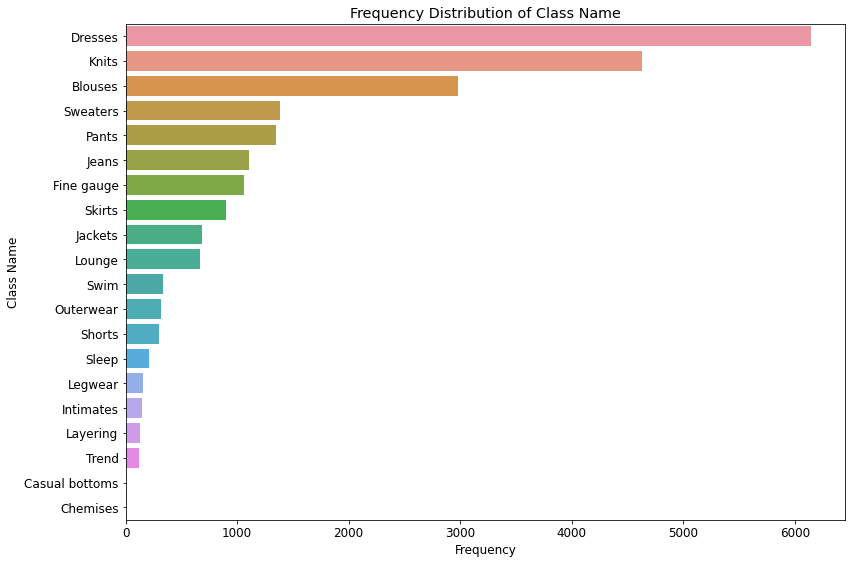

In [ ]:

plt.subplots(figsize=(12, 8))
sns.countplot(y='Class Name', data=df,order=df['Class Name'].value_counts().index)
plt.title('Frequency Distribution of Class Name')
plt.xlabel('Frequency')
plt.tight_layout()
plt.savefig('freqdist-classname.png', format='png', dpi=300)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [ ]:
for column in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[column].notnull()]
df.drop(df.columns[0], inplace=True, axis=1)

In [ ]:
df.shape

(22628, 11)

In [ ]:
df['Label'] = 0

In [ ]:
df['Label'] = 0

In [ ]:
df['Word Count'] = df['Review Text'].str.split().apply(len)

In [ ]:
df.sample(5)

,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Word Count
2618,33,Dissapointed,I agree with the other reviewer that the color...,3,0,0,General,Tops,Blouses,0,52
21051,46,Darling!,This is beautiful and the leather metallic cir...,4,1,14,General Petite,Bottoms,Skirts,0,62
19813,34,Love!,This dress is so flattering! i absolutely love...,5,1,0,General Petite,Dresses,Dresses,0,80
14369,45,NaN,"Really flattering cut, this shirt is perfect f...",5,1,0,General Petite,Tops,Blouses,0,19
10327,24,NaN,I loved these and wore them once (i bought the...,2,0,4,General Petite,Bottoms,Pants,0,51


In [ ]:
df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Label,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0


In [ ]:
df[['Title', 'Division Name', 'Department Name', 'Class Name']].describe(include=['O']).T.drop('count', axis=1)

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,13365
Department Name,6,Tops,10048
Class Name,20,Dresses,6145


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

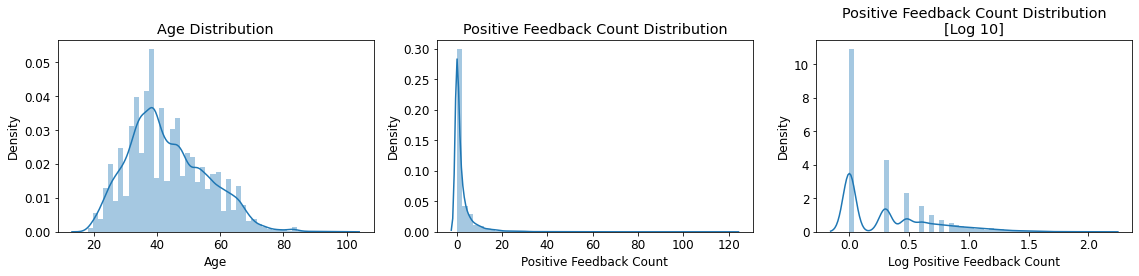

In [ ]:
#Age and Positive Feedback Frequency Distributions
f, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_ylabel('Density')
sns.distplot(df['Positive Feedback Count'], ax=ax[1])
ax[1].set_title('Positive Feedback Count Distribution')
sns.distplot(np.log10((df['Positive Feedback Count'][df['Positive Feedback Count'].notnull()] + 1)), ax=ax[2])
ax[2].set_title('Positive Feedback Count Distribution\n[Log 10]')
ax[2].set_xlabel('Log Positive Feedback Count')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('age-and-positive-feedback-freqdist.png', format='png', dpi=600)
plt.show()

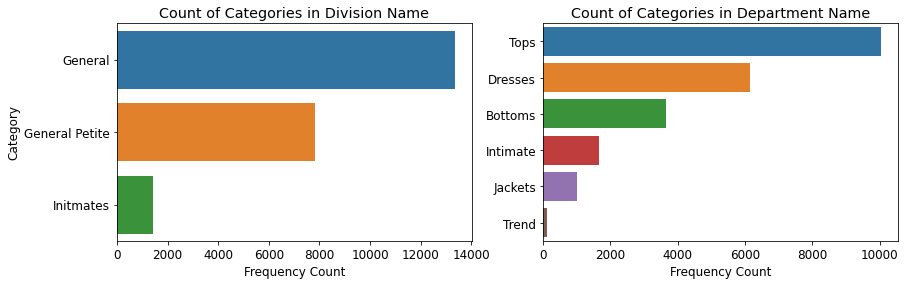

In [ ]:
#Division Name and Department Name Distributions
row_plots = ['Division Name', 'Department Name']
f, axes = plt.subplots(1, len(row_plots), figsize=(14, 4), sharex=False)

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.savefig('divname-and-deptname-freqdist.png', format='png', dpi=600)
plt.show()

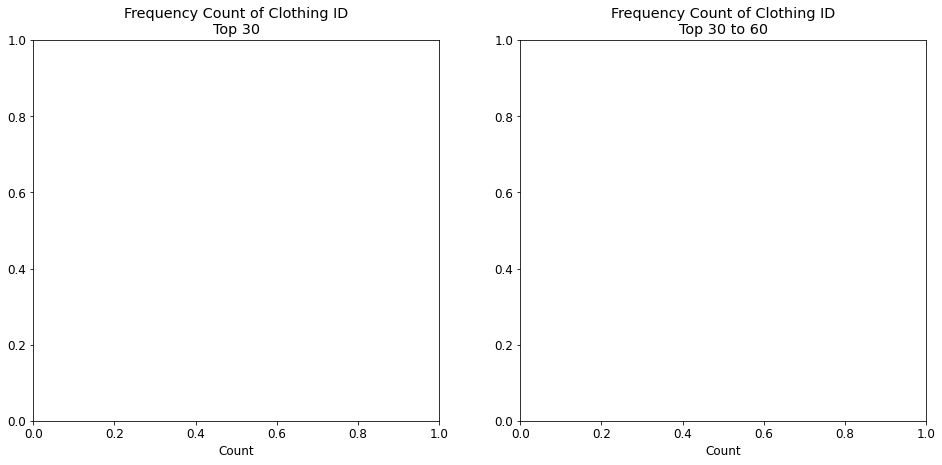

Dataframe Dimension: 19662 Rows


KeyError: ignored

In [ ]:
# Clothing ID Category
#Clothing ID Frequency Distribution
f, axes = plt.subplots(1, 2, figsize=[16, 7])
num = 30
#sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[:num].index)],
              #order= df['Clothing ID'].value_counts()[:num].index, ax=axes[0])
axes[0].set_title('Frequency Count of Clothing ID\nTop 30')
axes[0].set_xlabel('Count')

#sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[num:60].index)],
              #order=df['Clothing ID'].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title('Frequency Count of Clothing ID\nTop 30 to 60')
axes[1].set_ylabel('')
axes[1].set_xlabel('Count')
plt.savefig('freqdist-clothingid-top60.png', format='png', dpi=600)
plt.show()

print('Dataframe Dimension: {} Rows'.format(df.shape[0]))
df[df['Clothing ID'].isin([1078, 862,1094])].describe().T.drop('count',axis=1)

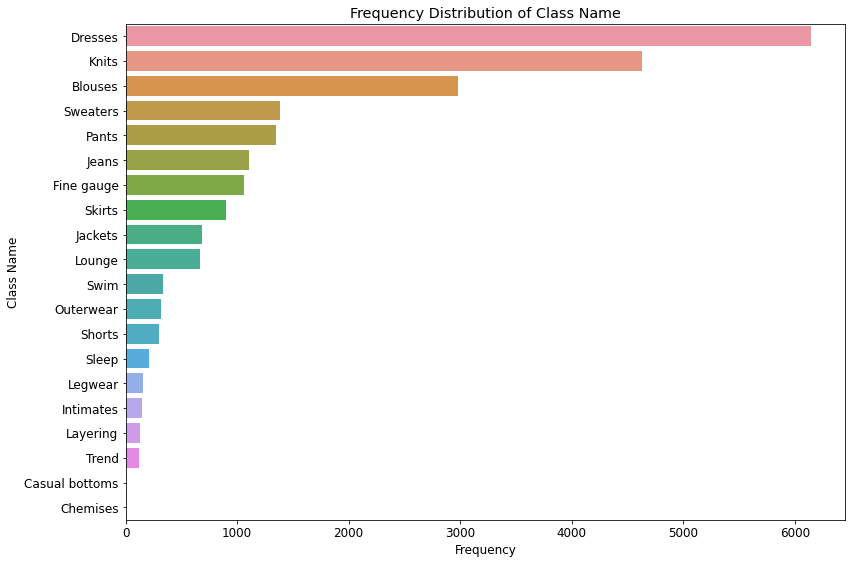

In [ ]:
# Class Name
plt.subplots(figsize=(12, 8))
sns.countplot(y='Class Name', data=df,order=df['Class Name'].value_counts().index)
plt.title('Frequency Distribution of Class Name')
plt.xlabel('Frequency')
plt.tight_layout()
plt.savefig('freqdist-classname.png', format='png', dpi=300)
plt.show()

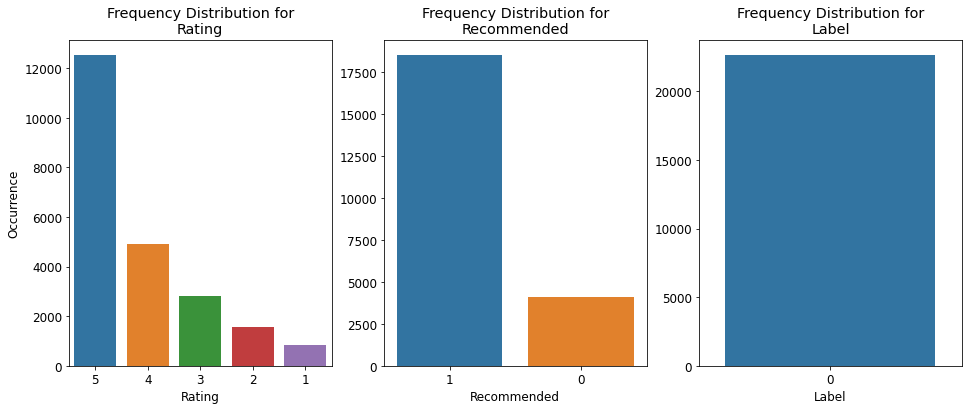

In [ ]:
#Frequency Distribution of Rating, Recommended IND, and Label
cat_dtypes = ['Rating', 'Recommended', 'Label']
increment = 0
f, axes = plt.subplots(1, len(cat_dtypes), figsize=(16, 6), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df, order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title('Frequency Distribution for\n{}'.format(cat_dtypes[increment]))
    axes[i].set_ylabel('Occurrence')
    axes[i].set_xlabel('{}'.format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.savefig('freqdist-rating-recommended-label.png', format='png', dpi=300)
plt.show()

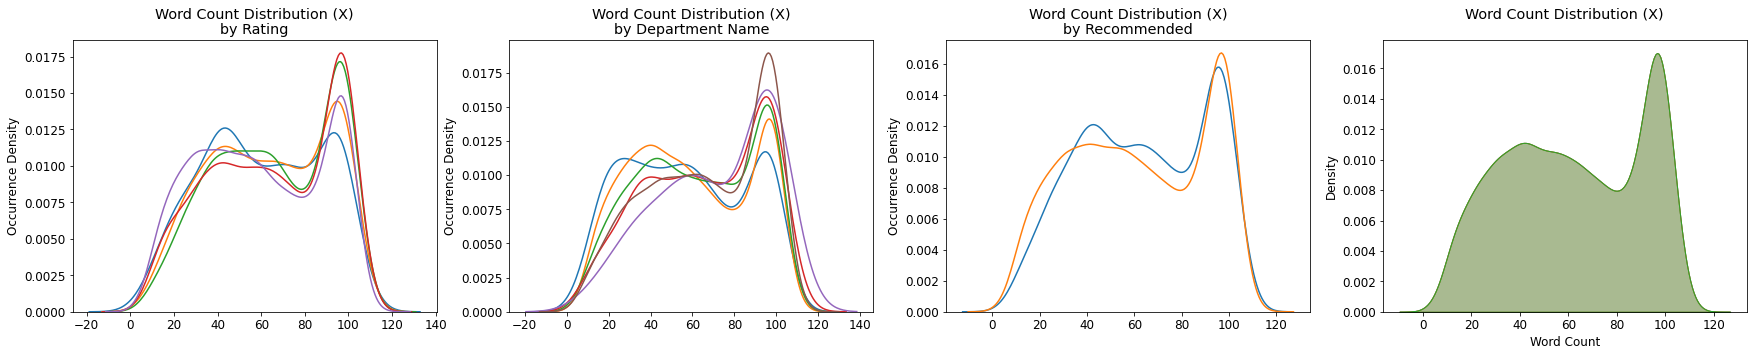


Total Word Count is: 1221308


count    19662.000000
mean        62.115146
std         28.200497
min          2.000000
25%         38.000000
50%         62.000000
75%         90.000000
max        115.000000
Name: Word Count, dtype: float64

In [ ]:
f, axes = plt.subplots(1, 4, figsize=(30, 5), sharex=False)

for index, y in enumerate(['Rating', 'Department Name', 'Recommended']):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(df['Word Count'][df[y]==x], label=x, shade=False, ax=axes[index])
        axes[index].set_title('{} Distribution (X)\nby {}'.format('Word Count', y))
    axes[index].set_ylabel('Occurrence Density')
    axes[index].set_xlabel('')
    
    # Plot 4
    axes[3].set_title('Word Count Distribution (X)\n')
    sns.kdeplot(df['Word Count'],shade=True,ax=axes[3])
    axes[index].set_xlabel("")
    #axes[3].legend_.remove()
plt.savefig('wordcountdist-rating-deptname-recommended.png', format='png', dpi=300)
plt.show()

print("\nTotal Word Count is: {}".format(df["Word Count"].sum()))
df['Word Count'].describe().T

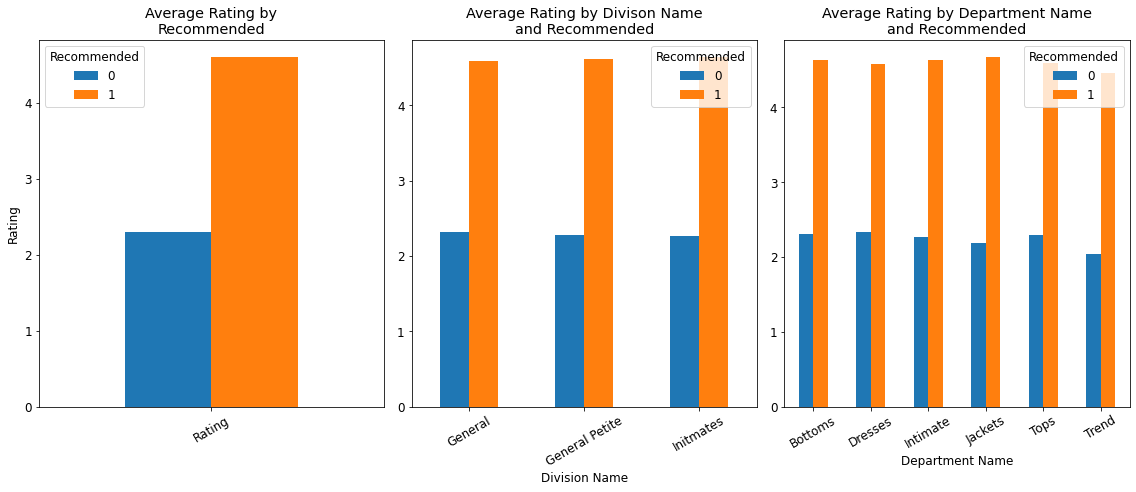

In [ ]:
#Word Count by Rating, Department Name, and Recommended 
f, axes = plt.subplots(1, 3, figsize=(16, 7))
rot = 30
df.pivot_table('Rating',
               columns=['Recommended']).plot.bar(ax=axes[0], rot=rot)
axes[0].set_title('Average Rating by\nRecommended')
df.pivot_table('Rating', index='Division Name',
               columns=['Recommended']).plot.bar(ax=axes[1], rot=rot)
axes[1].set_title('Average Rating by Divison Name\nand Recommended')
df.pivot_table('Rating', index='Department Name',
               columns=['Recommended']).plot.bar(ax=axes[2], rot=rot)
axes[0].set_ylabel('Rating')
axes[2].set_title('Average Rating by Department Name\nand Recommended')
f.tight_layout()
plt.savefig('meanrating-deptname-recommended.png', format='png', dpi=300)
plt.show()

In [ ]:
#Percentage Standardize Distribution Plots
def percentstandardize_barplot(x, y, hue, data, ax=None, order=None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x=x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
          .reset_index(drop=True)
          .groupby([x])[hue]
          .value_counts(normalize=True)
          .rename('Percentage').mul(100)
          .reset_index()
          .sort_values(hue)))
    plt.title('Percentage Frequency of {} by {}'.format(hue, x))
    plt.ylabel('Percentage %')

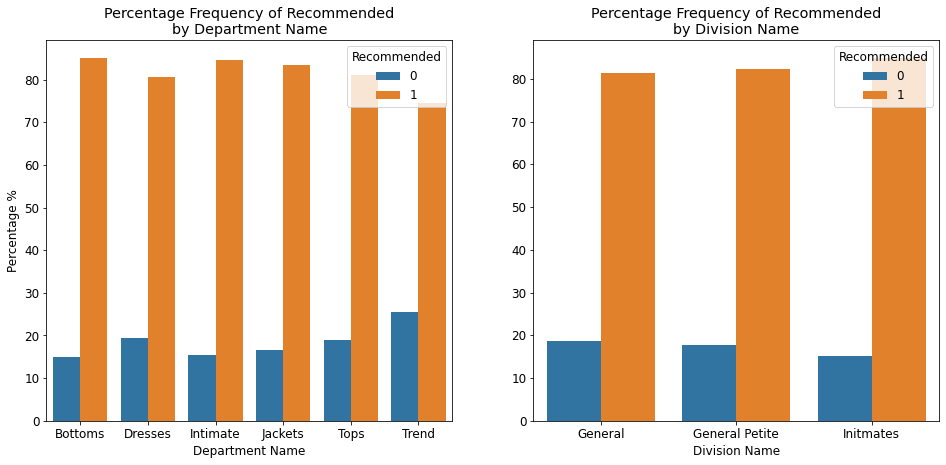

In [ ]:
#Recommended by Department and Division
huevar = 'Recommended'
f, axes = plt.subplots(1, 2, figsize=(16, 7))
percentstandardize_barplot(x='Department Name', y='Percentage', hue=huevar,data=df, ax=axes[0])
axes[0].set_title('Percentage Frequency of {}\nby Department Name'.format(huevar))
axes[0].set_ylabel('Percentage %')
percentstandardize_barplot(x='Division Name', y='Percentage', hue=huevar, data=df, ax=axes[1])
axes[1].set_title('Percentage Frequency of {}\nby Division Name'.format(huevar))
axes[1].set_ylabel('')
plt.savefig('recommended-deptname-divname.png', format='png', dpi=300)
plt.show()

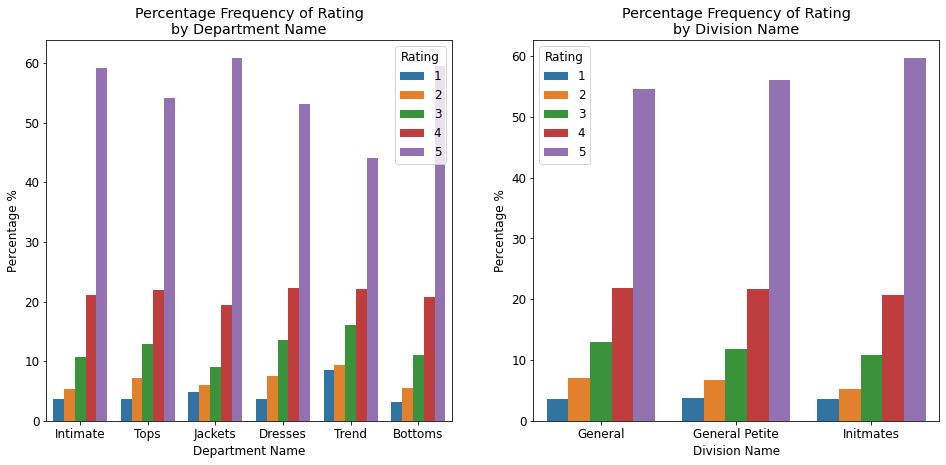

In [ ]:
#Rating by Department and Division Name
xvar = ['Department Name', 'Division Name']
huevar = 'Rating'
f, axes = plt.subplots(1, 2, figsize=(16, 7))
percentstandardize_barplot(x=xvar[0], y='Percentage', hue=huevar, data=df, ax=axes[0])
axes[0].set_title('Percentage Frequency of {}\nby {}'.format(huevar, xvar[0]))
axes[0].set_ylabel('Percentage %')
percentstandardize_barplot(x=xvar[1], y='Percentage', hue=huevar, data=df, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[1]))
plt.savefig('rating-deptname-divname.png', format='png', dpi=300)
plt.show()

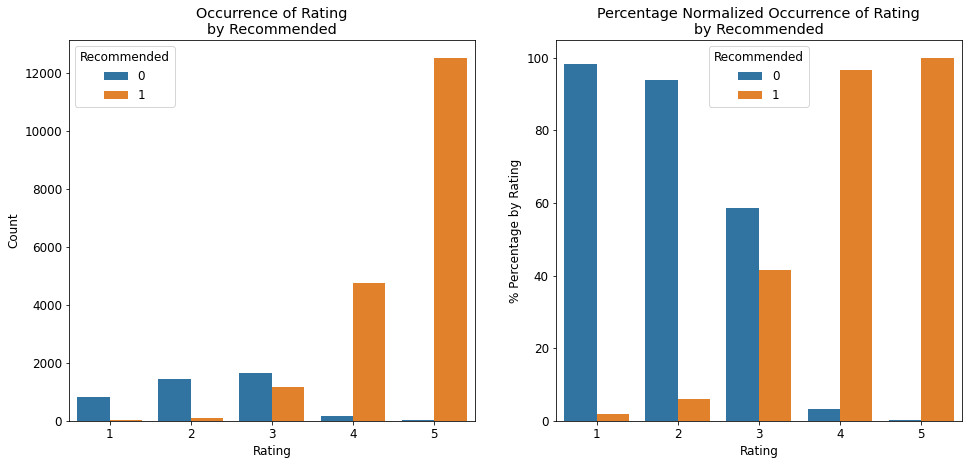

In [ ]:
#Rating by Recommended 
huevar = 'Rating'
f, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.countplot(x='Rating', hue='Recommended', data=df, ax=axes[0])
axes[0].set_title('Occurrence of {}\nby {}'.format(huevar, 'Recommended'))
axes[0].set_ylabel('Count')
percentstandardize_barplot(x='Rating', y='Percentage', hue='Recommended', data=df, ax=axes[1])
axes[1].set_title('Percentage Normalized Occurrence of {}\nby {}'.format(huevar, 'Recommended'))
axes[1].set_ylabel('% Percentage by Rating')
plt.savefig('rating-recommended.png', format='png', dpi=300)
plt.show()

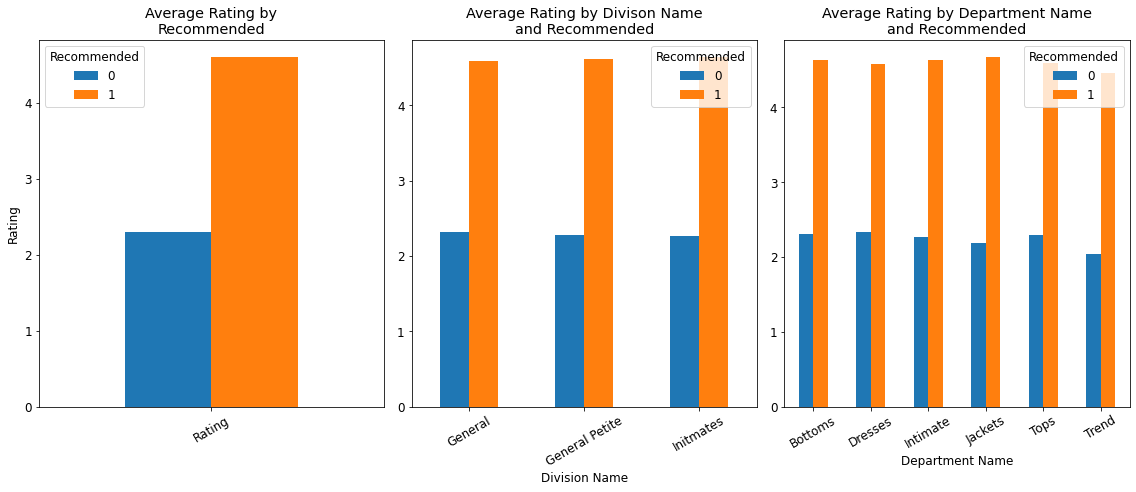

In [ ]:
#Rating by Recommended
f, axes = plt.subplots(1, 3, figsize=(16, 7))
rot = 30
df.pivot_table('Rating',
               columns=['Recommended']).plot.bar(ax=axes[0], rot=rot)
axes[0].set_title('Average Rating by\nRecommended')
df.pivot_table('Rating', index='Division Name',
               columns=['Recommended']).plot.bar(ax=axes[1], rot=rot)
axes[1].set_title('Average Rating by Divison Name\nand Recommended')
df.pivot_table('Rating', index='Department Name',
               columns=['Recommended']).plot.bar(ax=axes[2], rot=rot)
axes[0].set_ylabel('Rating')
axes[2].set_title('Average Rating by Department Name\nand Recommended')
f.tight_layout()
plt.savefig('meanrating-deptname-recommended.png', format='png', dpi=300)
plt.show()

In [ ]:
#Working with Text
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
18460,Unique front and back,"The back of this top is very unique and the embroidery looked like it would hold up.\nit does have a boxy shape, but it really works with this piece. i found it to run true to size compared to other pieces i have from retailer. for some reference, i'm 5'5"" and weigh 148lbs.",5
9355,Nicely styled with great fabric & pattern,"Love the pattern & fabric. it does run a little large. i usually take a medium or large but with this dress, i may have even taken a small. it is somewhat drapey, which i like, but that needs to be considered when sizing for it. i'm hoping it shrinks a tad so the dress has a bit more shape. i'd exchange it, but i love the pattern & quirky sleeves so much i want to keep it! got this gem on sale & can't wait to wear it in the spring & summer months next year (or maybe on a warm vacation)...",4
22869,Runs very big,"I ordered the red in xs petite, xxs and xxs petite (in case petite was too short). so far, the xs petite and xxs petite were shipped to me, however, thought the bag said petite, the actual dresses inside were regular sizes, and they were huge, even the xxs (i put it on on top of another knit dress and it was big0. so i reordered, this time only the xxs petite (though i am technically waiting for the xxs regular)... perhaps all the bags have been switched... we shall see, but perhaps this isn...",4
21253,Love this jacket!,"I had been looking for a jacket like this for months, but haven't found the right style, until i saw this one! luckily it was on sale. i am 5'10, weigh ca. 143lb's and i usually wear a size small in all retailer tops. tried on medium, but it was too big in the bust area., then i tried on the small and it fits great! the sleeves are long enough too, but it is hard to move my arms up to reach something, so i just have to avoid that. :) i have gotten a lot of compliments for it.",5
14744,No pockets,"I was disappointed that this dress had no pockets, as every picture on this website suggests. otherwise, it is a great color and shape. still sad though...",3
14373,NaN,"Incredibly flattering cut! i got so many compliments when i wore this dress to a friend's wedding. with the built in bra, you don't have to add extra uncomfortable layers. it stays put with or without the straps! the skirt is blissfully full and fun for twirling. i had a little trouble figuring out the belt, as it wraps around multiple times. but once i worked that out, it was perfect! love this cut! i hope they make it again it different colors!",5
10977,Amazing!,"I tried this dress in store and was in love immediately! i had to special order a petite size, but fits wonderfully. for me, ran a little large. i'm 5'2"" and 105 and ended up with a petite xxs and it fits great!",5


In [ ]:
#Text Cleaning
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

In [ ]:
#Sentiment Analysis
import nltk
#nltk.download('vader_lexicon')
  
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df['Review Text']= df['Review Text'].astype(str)

# Applying Model, Variable Creation
df['Polarity Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['compound'])
df['Neutral Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neu'])
df['Negative Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neg'])
df['Positive Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment'] = ''
df.loc[df['Polarity Score'] > 0, 'Sentiment'] = 'Positive'
df.loc[df['Polarity Score'] == 0, 'Sentiment'] = 'Neutral'
df.loc[df['Polarity Score'] < 0, 'Sentiment'] = 'Negative'

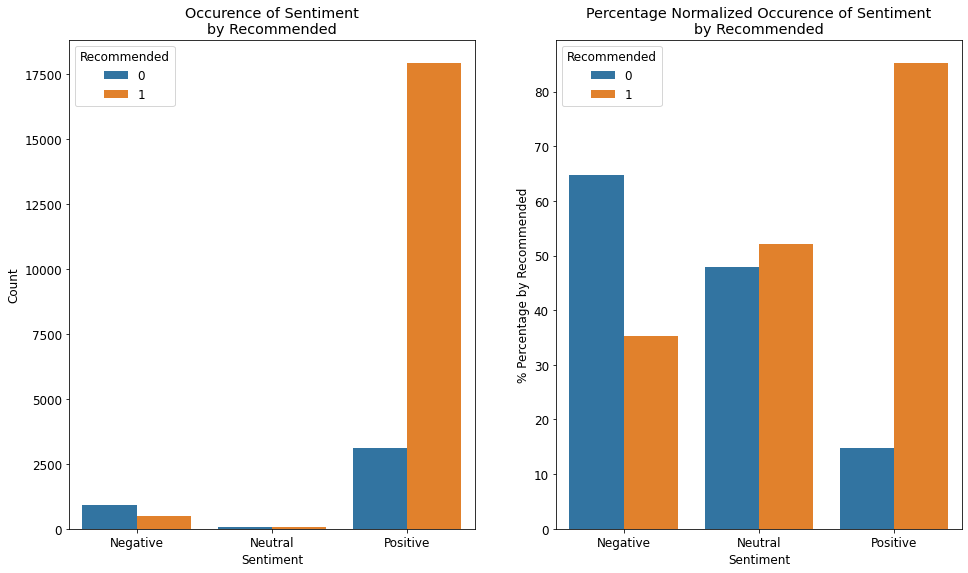

In [ ]:
#Normalize Plots for Sentiment Distribution
huevar = 'Recommended'
xvar = 'Sentiment'
f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=['Negative', 'Neutral', 'Positive'])
axes[0].set_title('Occurence of {}\nby {}'.format(xvar, huevar))
axes[0].set_ylabel('Count')
percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=df, ax=axes[1])
axes[1].set_title('Percentage Normalized Occurence of {}\nby {}'.format(xvar, huevar))
axes[1].set_ylabel('% Percentage by {}'.format(huevar))
plt.savefig('norm-sentimentdist.png', format='png', dpi=300)
plt.show()

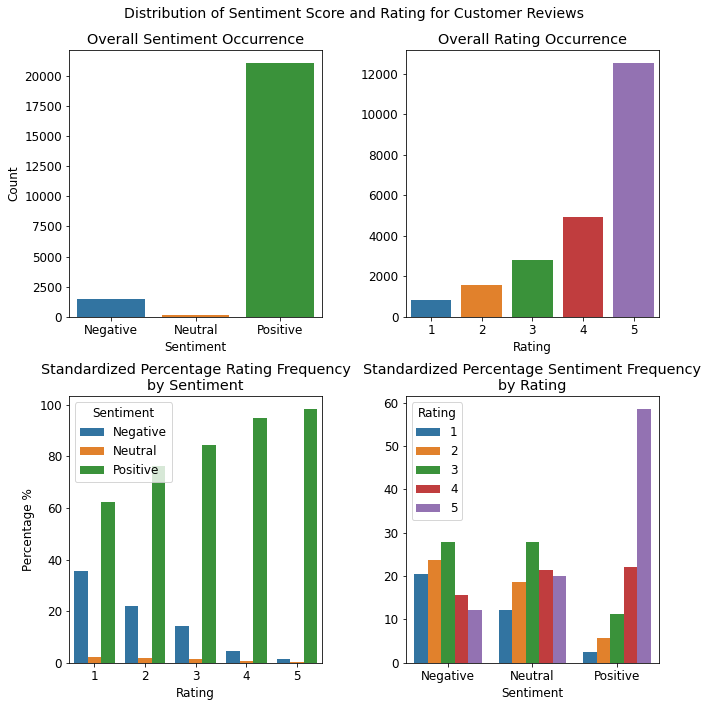

In [ ]:
f, axes = plt.subplots(2, 2, figsize=[10, 10])
sns.countplot(x='Sentiment', data=df, ax=axes[0, 0], order=['Negative', 'Neutral', 'Positive'])
axes[0,0].set_xlabel('Sentiment')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Overall Sentiment Occurrence')

sns.countplot(x='Rating', data=df, ax=axes[0, 1])
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('')
axes[0,1].set_title('Overall Rating Occurrence')

percentstandardize_barplot(x='Rating', y='Percentage', hue='Sentiment', data=df, ax=axes[1, 0])
axes[1,0].set_xlabel('Rating')
axes[1,0].set_ylabel('Percentage %')
axes[1,0].set_title('Standardized Percentage Rating Frequency\nby Sentiment')

percentstandardize_barplot(x='Sentiment', y='Percentage',hue='Rating', data=df, ax=axes[1, 1])
axes[1,1].set_ylabel('Occurrence Frequency')
axes[1,1].set_title('Standardized Percentage Sentiment Frequency\nby Rating')
axes[1,1].set_xlabel('Sentiment')
axes[1,1].set_ylabel('')

f.suptitle('Distribution of Sentiment Score and Rating for Customer Reviews', fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.savefig('sentimentscoredist-rating.png', format='png', dpi=300)
plt.show()

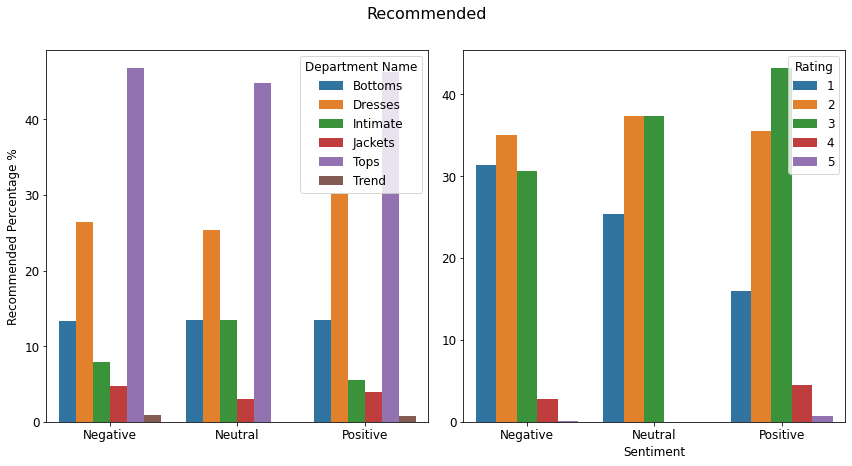

In [ ]:
xvar = 'Sentiment'
huevar = 'Department Name'
rowvar = 'Recommended'

# Plot
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False, sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=df[df[rowvar] == x],
                               ax=axes[i,0], order=['Negative','Neutral','Positive'])
    percentstandardize_barplot(x=xvar, y='Percentage', hue='Rating', data=df[df[rowvar] == x],
                               ax=axes[i,1], order=['Negative','Neutral','Positive'])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Recommended Percentage %')

#axes.flat[-1].set_visible(False) # to remove last plot
axes.flat[-1].set_visible(False) # to remove last plot
axes.flat[-2].set_visible(False) # to remove last plot


# Common title and ylabel
f.text(0.0, 0.5, '', va='center', rotation='vertical', fontsize=12)
f.suptitle('Recommended', fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
from nltk.corpus import stopwords
import string
df=df.dropna()

def text_process(review):
    wrd = [word for word in review if word not in string.punctuation]
    wrd = ''.join(wrd)
    return [word for word in wrd.split() if word.lower() not in stopwords.words('english')]
lass = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
x = lass['Review Text']
y = lass['Rating']

In [ ]:
vectorizer1 = CountVectorizer(analyzer = text_process).fit(raw_documents = x)
x = vectorizer1.transform(x)
x = x.toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 

knn = KNeighborsClassifier(n_neighbors = 100)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
knn = knn.fit(X_train, y_train)

knn_predicted_train = knn.predict(X_train)
knn_predicted_test = knn.predict(X_test)

knnacc=accuracy_score(y_test, knn_predicted_test)*100
knnpre=precision_score(y_test, knn_predicted_test,average = "macro")*100
knnrel=recall_score(y_test, knn_predicted_test,average = "macro")*100
knnf1c=f1_score(y_test, knn_predicted_test,average = "macro")*100

print("Accuracy :", knnacc)
print('Precision : ',knnpre)
print('Recall : ',knnrel)
print('F1-Score : ',knnf1c)

Accuracy : 94.84848484848484
Precision :  47.42424242424242
Recall :  50.0
F1-Score :  48.67807153965785


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
